In [2]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cpu'

In [15]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [16]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = weight * X_train + bias
X_test = X[train_split:]
y_test = weight * X_test + bias

len(X_train), len(X_test)

(40, 10)

In [17]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_labels, train_data, c = "r", label = "Training data")
    plt.scatter(test_labels, test_data, c = "b", label = "Testing data")
    
    if predictions is not None:
        plt.scatter(predictions, test_data, c = "g", label = "Predicted data")
    
    plt.legend()
    plt.show()

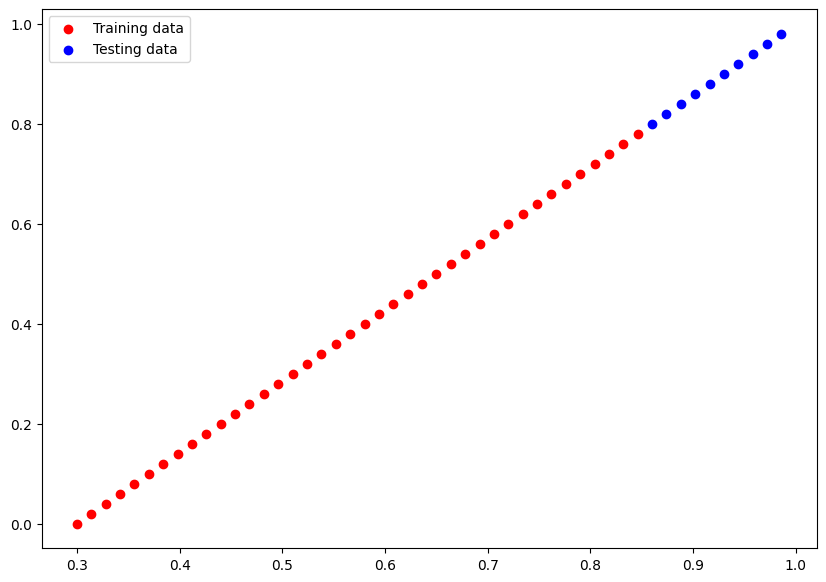

In [18]:
plot_predictions()

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_features = 1,
            out_features = 1
        )
    
    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

In [37]:
torch.manual_seed(42)
model = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [38]:
next(model.parameters()).device

device(type='cpu')

In [39]:
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [43]:
torch.manual_seed(42)

epochs = 301

for epoch in range(epochs):
    
    ### Training mode
    model.train()
    
    # 1. Do the forward pass
    y_preds = model(X_train)
    
    # 2. Calculate the loss
    train_loss = loss_fn(y_preds, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    train_loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    
    ### Testing mode
    model.eval()
    
    with torch.inference_mode():
        # 1. Do the forward pass
        test_preds = model(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_preds, y_test)
    
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 20 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 40 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 60 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 80 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 100 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 120 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 140 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 160 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 180 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 200 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 220 | Train loss: 0.010256484150886536 | Test loss: 0.0003308236482553184
Epoch: 240 | Train loss: 0.0102564

In [44]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

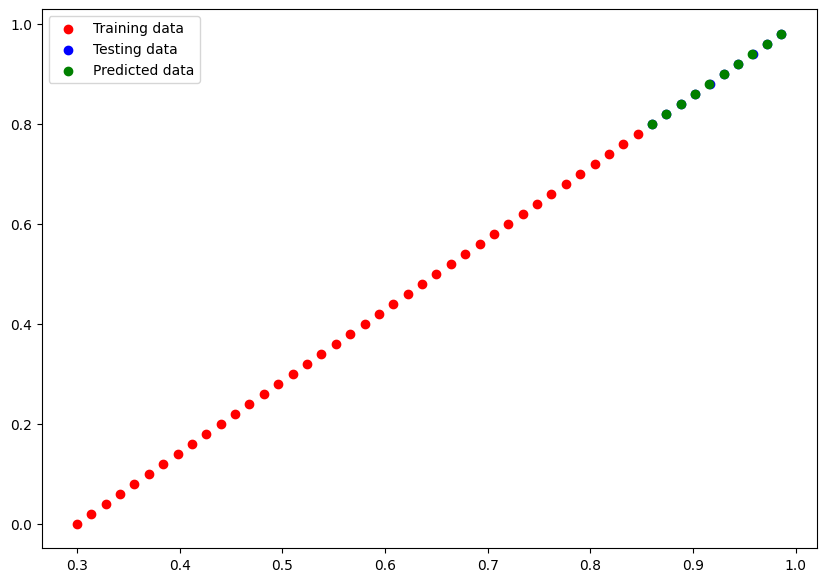

In [45]:
plot_predictions(predictions=test_preds)

In [46]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")

torch.save(obj=model.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


In [47]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(
    torch.load(
        MODEL_SAVE_PATH
    )
)

loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [48]:
model.state_dict(), loaded_model.state_dict()

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]))

In [49]:
loaded_model.eval()
model.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
    y_preds = model(X_test)

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])